### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [2]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [3]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [3]:
print(cust_df['var3'].value_counts( )[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [4]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))


피처 데이터 shape:(76020, 369)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [6]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))



[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [8]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\KwonChulmin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0]	validation_0-auc:0.715421	validation_1-auc:0.722463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.802656	validation_1-auc:0.807919
[2]	validation_0-auc:0.80013	validation_1-auc:0.804948
[3]	validation_0-auc:0.805843	validation_1-auc:0.809844
[4]	validation_0-auc:0.814728	validation_1-auc:0.817554
[5]	validation_0-auc:0.80989	validation_1-auc:0.812919
[6]	validation_0-auc:0.80994	validation_1-auc:0.813688
[7]	validation_0-auc:0.818246	validation_1-auc:0.820487
[8]	validation_0-auc:0.821681	validation_1-auc:0.823214
[9]	validation_0-auc:0.819933	validation_1-auc:0.821108
[10]	validation_0-auc:0.825898	validation_1-auc:0.825134
[11]	validation_0-auc:0.829776	validation_1-auc:0.827521
[12]	validation_0-auc:0.832087	validation_1-auc:0.828878
[13]	validation_0-auc:0.83185	validation_1-auc:0.827989
[14]	validation_0-auc:0.830253	validation_1-auc:0.826429
[1

[50]	validation_0-auc:0.86211	validation_1-auc:0.842776
[51]	validation_0-auc:0.863213	validation_1-auc:0.843216
[52]	validation_0-auc:0.863963	validation_1-auc:0.844009
[53]	validation_0-auc:0.864482	validation_1-auc:0.844648
[54]	validation_0-auc:0.865133	validation_1-auc:0.844937
[55]	validation_0-auc:0.865492	validation_1-auc:0.844709
[56]	validation_0-auc:0.865993	validation_1-auc:0.844996
[57]	validation_0-auc:0.866332	validation_1-auc:0.845129
[58]	validation_0-auc:0.866537	validation_1-auc:0.844909
[59]	validation_0-auc:0.866757	validation_1-auc:0.844844
[60]	validation_0-auc:0.867255	validation_1-auc:0.844642
[61]	validation_0-auc:0.867647	validation_1-auc:0.844413
[62]	validation_0-auc:0.86778	validation_1-auc:0.844403
[63]	validation_0-auc:0.868042	validation_1-auc:0.844125
[64]	validation_0-auc:0.868285	validation_1-auc:0.844139
[65]	validation_0-auc:0.868816	validation_1-auc:0.844317
[66]	validation_0-auc:0.868901	validation_1-auc:0.844326
[67]	validation_0-auc:0.869074	va

[12]	validation_0-auc:0.832194	validation_1-auc:0.830867
[13]	validation_0-auc:0.832881	validation_1-auc:0.830585
[14]	validation_0-auc:0.83105	validation_1-auc:0.829088
[15]	validation_0-auc:0.834064	validation_1-auc:0.830594
[16]	validation_0-auc:0.836488	validation_1-auc:0.832439
[17]	validation_0-auc:0.838566	validation_1-auc:0.834435
[18]	validation_0-auc:0.841291	validation_1-auc:0.836339
[19]	validation_0-auc:0.840159	validation_1-auc:0.835519
[20]	validation_0-auc:0.841893	validation_1-auc:0.836441
[21]	validation_0-auc:0.841405	validation_1-auc:0.836036
[22]	validation_0-auc:0.840321	validation_1-auc:0.834835
[23]	validation_0-auc:0.84251	validation_1-auc:0.837768
[24]	validation_0-auc:0.844119	validation_1-auc:0.839223
[25]	validation_0-auc:0.84386	validation_1-auc:0.83757
[26]	validation_0-auc:0.843624	validation_1-auc:0.836767
[27]	validation_0-auc:0.845274	validation_1-auc:0.838187
[28]	validation_0-auc:0.846582	validation_1-auc:0.839603
[29]	validation_0-auc:0.84632	valid

[66]	validation_0-auc:0.866101	validation_1-auc:0.844762
[67]	validation_0-auc:0.866303	validation_1-auc:0.844544
[68]	validation_0-auc:0.866493	validation_1-auc:0.844325
[69]	validation_0-auc:0.866651	validation_1-auc:0.844105
[70]	validation_0-auc:0.866761	validation_1-auc:0.84405
[71]	validation_0-auc:0.866972	validation_1-auc:0.844211
[72]	validation_0-auc:0.867151	validation_1-auc:0.844122
[73]	validation_0-auc:0.867376	validation_1-auc:0.844185
[74]	validation_0-auc:0.867442	validation_1-auc:0.844186
[75]	validation_0-auc:0.867606	validation_1-auc:0.84417
[76]	validation_0-auc:0.86786	validation_1-auc:0.844023
[77]	validation_0-auc:0.86797	validation_1-auc:0.844189
[78]	validation_0-auc:0.868345	validation_1-auc:0.844065
[79]	validation_0-auc:0.868528	validation_1-auc:0.844039
[80]	validation_0-auc:0.868618	validation_1-auc:0.844043
[81]	validation_0-auc:0.868874	validation_1-auc:0.844012
[82]	validation_0-auc:0.869039	validation_1-auc:0.84399
[83]	validation_0-auc:0.869377	valid

[16]	validation_0-auc:0.848975	validation_1-auc:0.835177
[17]	validation_0-auc:0.851268	validation_1-auc:0.836379
[18]	validation_0-auc:0.853478	validation_1-auc:0.836386
[19]	validation_0-auc:0.852335	validation_1-auc:0.835925
[20]	validation_0-auc:0.855544	validation_1-auc:0.836983
[21]	validation_0-auc:0.855553	validation_1-auc:0.836397
[22]	validation_0-auc:0.855033	validation_1-auc:0.834445
[23]	validation_0-auc:0.856963	validation_1-auc:0.836413
[24]	validation_0-auc:0.85907	validation_1-auc:0.838012
[25]	validation_0-auc:0.859496	validation_1-auc:0.836454
[26]	validation_0-auc:0.860395	validation_1-auc:0.836356
[27]	validation_0-auc:0.862315	validation_1-auc:0.837705
[28]	validation_0-auc:0.864206	validation_1-auc:0.837761
[29]	validation_0-auc:0.863938	validation_1-auc:0.837658
[30]	validation_0-auc:0.865498	validation_1-auc:0.83833
[31]	validation_0-auc:0.866862	validation_1-auc:0.839237
[32]	validation_0-auc:0.86727	validation_1-auc:0.837928
[33]	validation_0-auc:0.86829	vali

[95]	validation_0-auc:0.894718	validation_1-auc:0.841673
Stopping. Best iteration:
[65]	validation_0-auc:0.888902	validation_1-auc:0.843524

[0]	validation_0-auc:0.736837	validation_1-auc:0.734096
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.822074	validation_1-auc:0.815712
[2]	validation_0-auc:0.814373	validation_1-auc:0.806888
[3]	validation_0-auc:0.828324	validation_1-auc:0.821214
[4]	validation_0-auc:0.832905	validation_1-auc:0.825577
[5]	validation_0-auc:0.82953	validation_1-auc:0.822776
[6]	validation_0-auc:0.830211	validation_1-auc:0.822255
[7]	validation_0-auc:0.833664	validation_1-auc:0.825988
[8]	validation_0-auc:0.839	validation_1-auc:0.82913
[9]	validation_0-auc:0.838751	validation_1-auc:0.828431
[10]	validation_0-auc:0.843419	validation_1-auc:0.830844
[11]	validation_0-auc:0.845813	validation_1-auc:0.833661
[12]	validation_0-auc:0.847898	va

[45]	validation_0-auc:0.870867	validation_1-auc:0.836073
[46]	validation_0-auc:0.872491	validation_1-auc:0.836406
[47]	validation_0-auc:0.873587	validation_1-auc:0.837012
[48]	validation_0-auc:0.873936	validation_1-auc:0.83661
[49]	validation_0-auc:0.874852	validation_1-auc:0.836541
[50]	validation_0-auc:0.87495	validation_1-auc:0.835912
[51]	validation_0-auc:0.875651	validation_1-auc:0.836387
[52]	validation_0-auc:0.876333	validation_1-auc:0.836816
[53]	validation_0-auc:0.876628	validation_1-auc:0.837388
[54]	validation_0-auc:0.877094	validation_1-auc:0.837832
[55]	validation_0-auc:0.877855	validation_1-auc:0.83797
[56]	validation_0-auc:0.87859	validation_1-auc:0.838514
[57]	validation_0-auc:0.878867	validation_1-auc:0.838492
[58]	validation_0-auc:0.87909	validation_1-auc:0.838433
[59]	validation_0-auc:0.879142	validation_1-auc:0.838469
[60]	validation_0-auc:0.879478	validation_1-auc:0.83843
[61]	validation_0-auc:0.879742	validation_1-auc:0.838421
Stopping. Best iteration:
[31]	valida

[21]	validation_0-auc:0.856136	validation_1-auc:0.837891
[22]	validation_0-auc:0.85573	validation_1-auc:0.837673
[23]	validation_0-auc:0.857501	validation_1-auc:0.837776
[24]	validation_0-auc:0.858376	validation_1-auc:0.83902
[25]	validation_0-auc:0.858584	validation_1-auc:0.838329
[26]	validation_0-auc:0.858925	validation_1-auc:0.837917
[27]	validation_0-auc:0.859719	validation_1-auc:0.839459
[28]	validation_0-auc:0.861408	validation_1-auc:0.839827
[29]	validation_0-auc:0.861979	validation_1-auc:0.839394
[30]	validation_0-auc:0.863815	validation_1-auc:0.840433
[31]	validation_0-auc:0.865709	validation_1-auc:0.841593
[32]	validation_0-auc:0.865927	validation_1-auc:0.839924
[33]	validation_0-auc:0.866076	validation_1-auc:0.839817
[34]	validation_0-auc:0.865947	validation_1-auc:0.839194
[35]	validation_0-auc:0.867983	validation_1-auc:0.840204
[36]	validation_0-auc:0.869748	validation_1-auc:0.840745
[37]	validation_0-auc:0.869883	validation_1-auc:0.840638
[38]	validation_0-auc:0.869663	va

[64]	validation_0-auc:0.868086	validation_1-auc:0.838147
[65]	validation_0-auc:0.868253	validation_1-auc:0.838083
[66]	validation_0-auc:0.86836	validation_1-auc:0.838071
Stopping. Best iteration:
[36]	validation_0-auc:0.855359	validation_1-auc:0.840182

[0]	validation_0-auc:0.808752	validation_1-auc:0.799538
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.814155	validation_1-auc:0.808631
[2]	validation_0-auc:0.822097	validation_1-auc:0.818521
[3]	validation_0-auc:0.824996	validation_1-auc:0.821016
[4]	validation_0-auc:0.825963	validation_1-auc:0.822125
[5]	validation_0-auc:0.828318	validation_1-auc:0.821873
[6]	validation_0-auc:0.830602	validation_1-auc:0.821908
[7]	validation_0-auc:0.831274	validation_1-auc:0.822271
[8]	validation_0-auc:0.832728	validation_1-auc:0.823545
[9]	validation_0-auc:0.834143	validation_1-auc:0.824065
[10]	validation_0-auc:0.83516

[35]	validation_0-auc:0.856007	validation_1-auc:0.840675
[36]	validation_0-auc:0.856613	validation_1-auc:0.84121
[37]	validation_0-auc:0.85704	validation_1-auc:0.841175
[38]	validation_0-auc:0.858183	validation_1-auc:0.84155
[39]	validation_0-auc:0.858743	validation_1-auc:0.842177
[40]	validation_0-auc:0.859182	validation_1-auc:0.842212
[41]	validation_0-auc:0.859824	validation_1-auc:0.842693
[42]	validation_0-auc:0.860398	validation_1-auc:0.842827
[43]	validation_0-auc:0.860834	validation_1-auc:0.84255
[44]	validation_0-auc:0.861246	validation_1-auc:0.842194
[45]	validation_0-auc:0.861927	validation_1-auc:0.842308
[46]	validation_0-auc:0.862073	validation_1-auc:0.842397
[47]	validation_0-auc:0.862353	validation_1-auc:0.842439
[48]	validation_0-auc:0.862928	validation_1-auc:0.842538
[49]	validation_0-auc:0.863425	validation_1-auc:0.8424
[50]	validation_0-auc:0.864056	validation_1-auc:0.842676
[51]	validation_0-auc:0.864357	validation_1-auc:0.842524
[52]	validation_0-auc:0.864609	valida

Stopping. Best iteration:
[52]	validation_0-auc:0.860766	validation_1-auc:0.840366

[0]	validation_0-auc:0.811089	validation_1-auc:0.810522
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.816145	validation_1-auc:0.80958
[2]	validation_0-auc:0.823006	validation_1-auc:0.815162
[3]	validation_0-auc:0.826799	validation_1-auc:0.820588
[4]	validation_0-auc:0.828171	validation_1-auc:0.822185
[5]	validation_0-auc:0.830317	validation_1-auc:0.821841
[6]	validation_0-auc:0.831526	validation_1-auc:0.82214
[7]	validation_0-auc:0.833025	validation_1-auc:0.823823
[8]	validation_0-auc:0.833822	validation_1-auc:0.824124
[9]	validation_0-auc:0.835479	validation_1-auc:0.825068
[10]	validation_0-auc:0.83707	validation_1-auc:0.82645
[11]	validation_0-auc:0.838077	validation_1-auc:0.828302
[12]	validation_0-auc:0.838651	validation_1-auc:0.828116
[13]	validation_0-auc:0.83997	va

[43]	validation_0-auc:0.858114	validation_1-auc:0.840437
[44]	validation_0-auc:0.8587	validation_1-auc:0.840393
[45]	validation_0-auc:0.859208	validation_1-auc:0.840227
[46]	validation_0-auc:0.859787	validation_1-auc:0.840334
[47]	validation_0-auc:0.860175	validation_1-auc:0.840495
[48]	validation_0-auc:0.860447	validation_1-auc:0.840604
[49]	validation_0-auc:0.860756	validation_1-auc:0.840793
[50]	validation_0-auc:0.8614	validation_1-auc:0.841389
[51]	validation_0-auc:0.861773	validation_1-auc:0.841365
[52]	validation_0-auc:0.861854	validation_1-auc:0.84153
[53]	validation_0-auc:0.862384	validation_1-auc:0.84149
[54]	validation_0-auc:0.862676	validation_1-auc:0.841725
[55]	validation_0-auc:0.862848	validation_1-auc:0.841829
[56]	validation_0-auc:0.863278	validation_1-auc:0.841768
[57]	validation_0-auc:0.86356	validation_1-auc:0.841612
[58]	validation_0-auc:0.86411	validation_1-auc:0.841675
[59]	validation_0-auc:0.864374	validation_1-auc:0.841882
[60]	validation_0-auc:0.864549	validati

[21]	validation_0-auc:0.862989	validation_1-auc:0.838228
[22]	validation_0-auc:0.86408	validation_1-auc:0.838505
[23]	validation_0-auc:0.864833	validation_1-auc:0.839339
[24]	validation_0-auc:0.865275	validation_1-auc:0.839364
[25]	validation_0-auc:0.867226	validation_1-auc:0.839368
[26]	validation_0-auc:0.868347	validation_1-auc:0.839987
[27]	validation_0-auc:0.868822	validation_1-auc:0.839718
[28]	validation_0-auc:0.869747	validation_1-auc:0.839315
[29]	validation_0-auc:0.870582	validation_1-auc:0.839963
[30]	validation_0-auc:0.871132	validation_1-auc:0.840295
[31]	validation_0-auc:0.871655	validation_1-auc:0.8402
[32]	validation_0-auc:0.872709	validation_1-auc:0.840605
[33]	validation_0-auc:0.873597	validation_1-auc:0.840609
[34]	validation_0-auc:0.874485	validation_1-auc:0.841155
[35]	validation_0-auc:0.875671	validation_1-auc:0.840878
[36]	validation_0-auc:0.876407	validation_1-auc:0.840645
[37]	validation_0-auc:0.877606	validation_1-auc:0.840808
[38]	validation_0-auc:0.878592	val

[23]	validation_0-auc:0.859264	validation_1-auc:0.838275
[24]	validation_0-auc:0.859998	validation_1-auc:0.839437
[25]	validation_0-auc:0.860713	validation_1-auc:0.839528
[26]	validation_0-auc:0.861887	validation_1-auc:0.839759
[27]	validation_0-auc:0.862421	validation_1-auc:0.839912
[28]	validation_0-auc:0.863272	validation_1-auc:0.839747
[29]	validation_0-auc:0.864173	validation_1-auc:0.839941
[30]	validation_0-auc:0.864581	validation_1-auc:0.840214
[31]	validation_0-auc:0.865165	validation_1-auc:0.840243
[32]	validation_0-auc:0.865982	validation_1-auc:0.839967
[33]	validation_0-auc:0.867174	validation_1-auc:0.840393
[34]	validation_0-auc:0.867784	validation_1-auc:0.84028
[35]	validation_0-auc:0.868347	validation_1-auc:0.839926
[36]	validation_0-auc:0.869124	validation_1-auc:0.839652
[37]	validation_0-auc:0.86975	validation_1-auc:0.83957
[38]	validation_0-auc:0.870294	validation_1-auc:0.839306
[39]	validation_0-auc:0.870689	validation_1-auc:0.83959
[40]	validation_0-auc:0.871538	vali

[0]	validation_0-auc:0.822547	validation_1-auc:0.816922
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.828707	validation_1-auc:0.82115
[2]	validation_0-auc:0.831882	validation_1-auc:0.821944
[3]	validation_0-auc:0.834654	validation_1-auc:0.82446
[4]	validation_0-auc:0.835563	validation_1-auc:0.825211
[5]	validation_0-auc:0.839081	validation_1-auc:0.827422
[6]	validation_0-auc:0.840656	validation_1-auc:0.828467
[7]	validation_0-auc:0.840958	validation_1-auc:0.829569
[8]	validation_0-auc:0.842797	validation_1-auc:0.830023
[9]	validation_0-auc:0.844924	validation_1-auc:0.832305
[10]	validation_0-auc:0.845608	validation_1-auc:0.831611
[11]	validation_0-auc:0.84683	validation_1-auc:0.832827
[12]	validation_0-auc:0.848602	validation_1-auc:0.832492
[13]	validation_0-auc:0.851937	validation_1-auc:0.834248
[14]	validation_0-auc:0.852856	validation_1-auc:0.834055
[

[48]	validation_0-auc:0.898112	validation_1-auc:0.843112
[49]	validation_0-auc:0.898969	validation_1-auc:0.843815
[50]	validation_0-auc:0.899723	validation_1-auc:0.843616
[51]	validation_0-auc:0.900311	validation_1-auc:0.843351
[52]	validation_0-auc:0.90076	validation_1-auc:0.843224
[53]	validation_0-auc:0.901219	validation_1-auc:0.843209
[54]	validation_0-auc:0.901953	validation_1-auc:0.84299
[55]	validation_0-auc:0.902292	validation_1-auc:0.843091
[56]	validation_0-auc:0.902796	validation_1-auc:0.842737
[57]	validation_0-auc:0.903409	validation_1-auc:0.842502
[58]	validation_0-auc:0.904051	validation_1-auc:0.842664
[59]	validation_0-auc:0.904293	validation_1-auc:0.842771
[60]	validation_0-auc:0.904655	validation_1-auc:0.842501
[61]	validation_0-auc:0.904978	validation_1-auc:0.842503
[62]	validation_0-auc:0.905361	validation_1-auc:0.8426
[63]	validation_0-auc:0.906145	validation_1-auc:0.842635
[64]	validation_0-auc:0.90649	validation_1-auc:0.842556
[65]	validation_0-auc:0.907426	valid

In [12]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.817284	validation_1-auc:0.811534
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.820302	validation_1-auc:0.812178
[2]	validation_0-auc:0.823363	validation_1-auc:0.816027
[3]	validation_0-auc:0.825007	validation_1-auc:0.81705
[4]	validation_0-auc:0.825243	validation_1-auc:0.817264
[5]	validation_0-auc:0.827563	validation_1-auc:0.819988
[6]	validation_0-auc:0.827812	validation_1-auc:0.819542
[7]	validation_0-auc:0.827855	validation_1-auc:0.819216
[8]	validation_0-auc:0.829221	validation_1-auc:0.819799
[9]	validation_0-auc:0.829078	validation_1-auc:0.818898
[10]	validation_0-auc:0.830731	validation_1-auc:0.820967
[11]	validation_0-auc:0.828293	validation_1-auc:0.819437
[12]	validation_0-auc:0.829608	validation_1-auc:0.821204
[13]	validation_0-auc:0.830487	validation_1-auc:0.821121
[14]	validation_0-auc:0.834894	validation_1-auc:0.82706

[141]	validation_0-auc:0.85609	validation_1-auc:0.840527
[142]	validation_0-auc:0.856058	validation_1-auc:0.840824
[143]	validation_0-auc:0.856179	validation_1-auc:0.840714
[144]	validation_0-auc:0.856461	validation_1-auc:0.840902
[145]	validation_0-auc:0.856596	validation_1-auc:0.840922
[146]	validation_0-auc:0.85682	validation_1-auc:0.840999
[147]	validation_0-auc:0.856856	validation_1-auc:0.841113
[148]	validation_0-auc:0.856846	validation_1-auc:0.84122
[149]	validation_0-auc:0.856846	validation_1-auc:0.841151
[150]	validation_0-auc:0.856784	validation_1-auc:0.841142
[151]	validation_0-auc:0.856753	validation_1-auc:0.841307
[152]	validation_0-auc:0.856646	validation_1-auc:0.841443
[153]	validation_0-auc:0.856637	validation_1-auc:0.841588
[154]	validation_0-auc:0.856957	validation_1-auc:0.841629
[155]	validation_0-auc:0.857008	validation_1-auc:0.841672
[156]	validation_0-auc:0.857301	validation_1-auc:0.841631
[157]	validation_0-auc:0.857543	validation_1-auc:0.841666
[158]	validation_

[283]	validation_0-auc:0.872776	validation_1-auc:0.843025
[284]	validation_0-auc:0.872829	validation_1-auc:0.843029
[285]	validation_0-auc:0.872917	validation_1-auc:0.842988
[286]	validation_0-auc:0.87303	validation_1-auc:0.842969
[287]	validation_0-auc:0.873159	validation_1-auc:0.842969
[288]	validation_0-auc:0.873233	validation_1-auc:0.843004
[289]	validation_0-auc:0.873346	validation_1-auc:0.843044
[290]	validation_0-auc:0.87339	validation_1-auc:0.843025
[291]	validation_0-auc:0.873534	validation_1-auc:0.843058
[292]	validation_0-auc:0.873577	validation_1-auc:0.843123
[293]	validation_0-auc:0.87364	validation_1-auc:0.843134
[294]	validation_0-auc:0.873695	validation_1-auc:0.843111
[295]	validation_0-auc:0.873769	validation_1-auc:0.843094
[296]	validation_0-auc:0.873849	validation_1-auc:0.843137
[297]	validation_0-auc:0.873987	validation_1-auc:0.843165
[298]	validation_0-auc:0.874085	validation_1-auc:0.843203
[299]	validation_0-auc:0.874167	validation_1-auc:0.843232
[300]	validation_

In [13]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82311	validation_1-auc:0.815226
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.827094	validation_1-auc:0.816566
[2]	validation_0-auc:0.832027	validation_1-auc:0.820393
[3]	validation_0-auc:0.835873	validation_1-auc:0.825019
[4]	validation_0-auc:0.838197	validation_1-auc:0.826078
[5]	validation_0-auc:0.837948	validation_1-auc:0.827282
[6]	validation_0-auc:0.8381	validation_1-auc:0.826888
[7]	validation_0-auc:0.838475	validation_1-auc:0.827131
[8]	validation_0-auc:0.839775	validation_1-auc:0.828198
[9]	validation_0-auc:0.83981	validation_1-auc:0.827834
[10]	validation_0-auc:0.841664	validation_1-auc:0.828996
[11]	validation_0-auc:0.841069	validation_1-auc:0.82802
[12]	validation_0-auc:0.841167	validation_1-auc:0.828517
[13]	validation_0-auc:0.841455	validation_1-auc:0.828317
[14]	validation_0-auc:0.845308	validation_1-auc:0.834099
[1

[142]	validation_0-auc:0.878656	validation_1-auc:0.843428
[143]	validation_0-auc:0.878713	validation_1-auc:0.843385
[144]	validation_0-auc:0.878905	validation_1-auc:0.843463
[145]	validation_0-auc:0.879131	validation_1-auc:0.843475
[146]	validation_0-auc:0.87937	validation_1-auc:0.843636
[147]	validation_0-auc:0.879459	validation_1-auc:0.843606
[148]	validation_0-auc:0.879425	validation_1-auc:0.843573
[149]	validation_0-auc:0.879568	validation_1-auc:0.843621
[150]	validation_0-auc:0.879684	validation_1-auc:0.843523
[151]	validation_0-auc:0.879746	validation_1-auc:0.843485
[152]	validation_0-auc:0.879772	validation_1-auc:0.84348
[153]	validation_0-auc:0.87969	validation_1-auc:0.843363
[154]	validation_0-auc:0.880169	validation_1-auc:0.843571
[155]	validation_0-auc:0.880258	validation_1-auc:0.84347
[156]	validation_0-auc:0.88067	validation_1-auc:0.84353
[157]	validation_0-auc:0.880969	validation_1-auc:0.843364
[158]	validation_0-auc:0.881349	validation_1-auc:0.843599
[159]	validation_0-a

[284]	validation_0-auc:0.903908	validation_1-auc:0.844534
[285]	validation_0-auc:0.903983	validation_1-auc:0.844493
[286]	validation_0-auc:0.904128	validation_1-auc:0.844469
[287]	validation_0-auc:0.904224	validation_1-auc:0.844478
[288]	validation_0-auc:0.904337	validation_1-auc:0.844413
[289]	validation_0-auc:0.904409	validation_1-auc:0.844408
[290]	validation_0-auc:0.904532	validation_1-auc:0.844505
[291]	validation_0-auc:0.904571	validation_1-auc:0.84446
[292]	validation_0-auc:0.904651	validation_1-auc:0.844474
[293]	validation_0-auc:0.904717	validation_1-auc:0.84443
[294]	validation_0-auc:0.904796	validation_1-auc:0.844373
[295]	validation_0-auc:0.9049	validation_1-auc:0.844322
[296]	validation_0-auc:0.904981	validation_1-auc:0.844269
[297]	validation_0-auc:0.9051	validation_1-auc:0.844265
[298]	validation_0-auc:0.905163	validation_1-auc:0.844253
[299]	validation_0-auc:0.905254	validation_1-auc:0.844185
[300]	validation_0-auc:0.905318	validation_1-auc:0.84414
[301]	validation_0-au

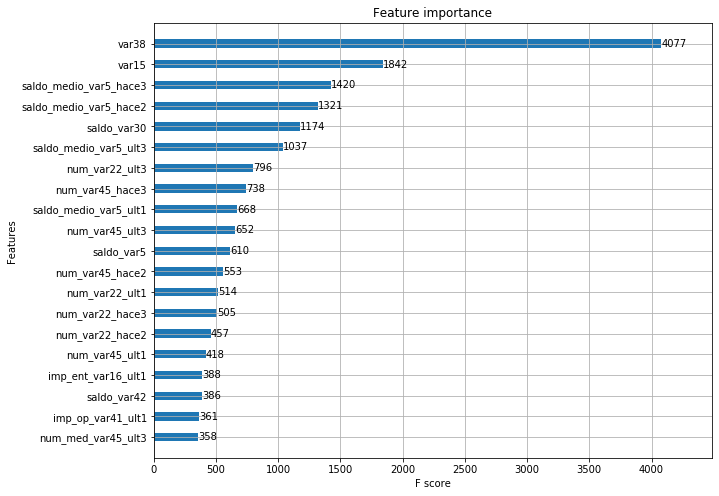

In [14]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [15]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.14

[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC AUC: 0.8396


In [16]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


C:\Users\KwonChulmin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	v

[31]	valid_0's auc: 0.875603	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.139539
[32]	valid_0's auc: 0.87651	valid_0's binary_logloss: 0.123413	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139561
[33]	valid_0's auc: 0.877103	valid_0's binary_logloss: 0.123199	valid_1's auc: 0.839235	valid_1's binary_logloss: 0.139528
[34]	valid_0's auc: 0.878189	valid_0's binary_logloss: 0.122925	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139567
[35]	valid_0's auc: 0.878765	valid_0's binary_logloss: 0.122704	valid_1's auc: 0.838946	valid_1's binary_logloss: 0.139572
[36]	valid_0's auc: 0.879377	valid_0's binary_logloss: 0.122448	valid_1's auc: 0.83898	valid_1's binary_logloss: 0.139554
[37]	valid_0's auc: 0.880134	valid_0's binary_logloss: 0.122143	valid_1's auc: 0.838888	valid_1's binary_logloss: 0.139557
[38]	valid_0's auc: 0.880571	valid_0's binary_logloss: 0.121985	valid_1's auc: 0.839133	valid_1's binary_logloss: 0.13952
[39]	valid_0's auc:

[39]	valid_0's auc: 0.879978	valid_0's binary_logloss: 0.122126	valid_1's auc: 0.83945	valid_1's binary_logloss: 0.139391
[40]	valid_0's auc: 0.880399	valid_0's binary_logloss: 0.121938	valid_1's auc: 0.840127	valid_1's binary_logloss: 0.139314
[41]	valid_0's auc: 0.880914	valid_0's binary_logloss: 0.121757	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.13937
[42]	valid_0's auc: 0.881674	valid_0's binary_logloss: 0.121547	valid_1's auc: 0.839744	valid_1's binary_logloss: 0.139371
[43]	valid_0's auc: 0.882352	valid_0's binary_logloss: 0.121291	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.139358
[44]	valid_0's auc: 0.882869	valid_0's binary_logloss: 0.121117	valid_1's auc: 0.839827	valid_1's binary_logloss: 0.13937
[45]	valid_0's auc: 0.883308	valid_0's binary_logloss: 0.120912	valid_1's auc: 0.839923	valid_1's binary_logloss: 0.139325
[46]	valid_0's auc: 0.883814	valid_0's binary_logloss: 0.120682	valid_1's auc: 0.83985	valid_1's binary_logloss: 0.139336
[47]	valid_0's auc: 

[10]	valid_0's auc: 0.85454	valid_0's binary_logloss: 0.134224	valid_1's auc: 0.838661	valid_1's binary_logloss: 0.144501
[11]	valid_0's auc: 0.856414	valid_0's binary_logloss: 0.133277	valid_1's auc: 0.838921	valid_1's binary_logloss: 0.143737
[12]	valid_0's auc: 0.857283	valid_0's binary_logloss: 0.132431	valid_1's auc: 0.837263	valid_1's binary_logloss: 0.143197
[13]	valid_0's auc: 0.858075	valid_0's binary_logloss: 0.131688	valid_1's auc: 0.837254	valid_1's binary_logloss: 0.142633
[14]	valid_0's auc: 0.858945	valid_0's binary_logloss: 0.130983	valid_1's auc: 0.837669	valid_1's binary_logloss: 0.142158
[15]	valid_0's auc: 0.859875	valid_0's binary_logloss: 0.130335	valid_1's auc: 0.837434	valid_1's binary_logloss: 0.141848
[16]	valid_0's auc: 0.860979	valid_0's binary_logloss: 0.129731	valid_1's auc: 0.837355	valid_1's binary_logloss: 0.141492
[17]	valid_0's auc: 0.861681	valid_0's binary_logloss: 0.129123	valid_1's auc: 0.837851	valid_1's binary_logloss: 0.14114
[18]	valid_0's auc

[18]	valid_0's auc: 0.862799	valid_0's binary_logloss: 0.128809	valid_1's auc: 0.838732	valid_1's binary_logloss: 0.141125
[19]	valid_0's auc: 0.864128	valid_0's binary_logloss: 0.128328	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.140763
[20]	valid_0's auc: 0.864975	valid_0's binary_logloss: 0.127913	valid_1's auc: 0.839957	valid_1's binary_logloss: 0.140513
[21]	valid_0's auc: 0.866258	valid_0's binary_logloss: 0.127436	valid_1's auc: 0.83993	valid_1's binary_logloss: 0.140328
[22]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.127069	valid_1's auc: 0.840099	valid_1's binary_logloss: 0.14013
[23]	valid_0's auc: 0.867852	valid_0's binary_logloss: 0.126713	valid_1's auc: 0.839768	valid_1's binary_logloss: 0.140027
[24]	valid_0's auc: 0.868599	valid_0's binary_logloss: 0.126372	valid_1's auc: 0.840299	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.869485	valid_0's binary_logloss: 0.126047	valid_1's auc: 0.840676	valid_1's binary_logloss: 0.139735
[26]	valid_0's auc

[31]	valid_0's auc: 0.890934	valid_0's binary_logloss: 0.118306	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.141525
[32]	valid_0's auc: 0.891349	valid_0's binary_logloss: 0.11798	valid_1's auc: 0.829723	valid_1's binary_logloss: 0.141529
[33]	valid_0's auc: 0.891896	valid_0's binary_logloss: 0.117633	valid_1's auc: 0.829851	valid_1's binary_logloss: 0.141488
[34]	valid_0's auc: 0.892553	valid_0's binary_logloss: 0.117331	valid_1's auc: 0.82916	valid_1's binary_logloss: 0.141607
[35]	valid_0's auc: 0.893197	valid_0's binary_logloss: 0.116998	valid_1's auc: 0.828503	valid_1's binary_logloss: 0.141781
[36]	valid_0's auc: 0.894242	valid_0's binary_logloss: 0.116658	valid_1's auc: 0.828875	valid_1's binary_logloss: 0.141779
Early stopping, best iteration is:
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logl

[14]	valid_0's auc: 0.872498	valid_0's binary_logloss: 0.127408	valid_1's auc: 0.837713	valid_1's binary_logloss: 0.142262
[15]	valid_0's auc: 0.873589	valid_0's binary_logloss: 0.126603	valid_1's auc: 0.837256	valid_1's binary_logloss: 0.141869
[16]	valid_0's auc: 0.875441	valid_0's binary_logloss: 0.125783	valid_1's auc: 0.837912	valid_1's binary_logloss: 0.141528
[17]	valid_0's auc: 0.877154	valid_0's binary_logloss: 0.125036	valid_1's auc: 0.836689	valid_1's binary_logloss: 0.141384
[18]	valid_0's auc: 0.878205	valid_0's binary_logloss: 0.124367	valid_1's auc: 0.835872	valid_1's binary_logloss: 0.141256
[19]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.12371	valid_1's auc: 0.835242	valid_1's binary_logloss: 0.141186
[20]	valid_0's auc: 0.880623	valid_0's binary_logloss: 0.123116	valid_1's auc: 0.835731	valid_1's binary_logloss: 0.140946
[21]	valid_0's auc: 0.881898	valid_0's binary_logloss: 0.122562	valid_1's auc: 0.834984	valid_1's binary_logloss: 0.140914
[22]	valid_0's au

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	

[10]	valid_0's auc: 0.85449	valid_0's binary_logloss: 0.134596	valid_1's auc: 0.837845	valid_1's binary_logloss: 0.144271
[11]	valid_0's auc: 0.855485	valid_0's binary_logloss: 0.133677	valid_1's auc: 0.838688	valid_1's binary_logloss: 0.14351
[12]	valid_0's auc: 0.856918	valid_0's binary_logloss: 0.132832	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.142834
[13]	valid_0's auc: 0.857461	valid_0's binary_logloss: 0.132079	valid_1's auc: 0.838477	valid_1's binary_logloss: 0.142308
[14]	valid_0's auc: 0.858342	valid_0's binary_logloss: 0.131428	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.141925
[15]	valid_0's auc: 0.858926	valid_0's binary_logloss: 0.130816	valid_1's auc: 0.838543	valid_1's binary_logloss: 0.141466
[16]	valid_0's auc: 0.859532	valid_0's binary_logloss: 0.130275	valid_1's auc: 0.838295	valid_1's binary_logloss: 0.141112
[17]	valid_0's auc: 0.860793	valid_0's binary_logloss: 0.129728	valid_1's auc: 0.837788	valid_1's binary_logloss: 0.140844
[18]	valid_0's auc

[39]	valid_0's auc: 0.877193	valid_0's binary_logloss: 0.123186	valid_1's auc: 0.84006	valid_1's binary_logloss: 0.139095
[40]	valid_0's auc: 0.877543	valid_0's binary_logloss: 0.123003	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.139144
[41]	valid_0's auc: 0.877994	valid_0's binary_logloss: 0.122806	valid_1's auc: 0.839925	valid_1's binary_logloss: 0.139157
[42]	valid_0's auc: 0.878413	valid_0's binary_logloss: 0.122608	valid_1's auc: 0.839588	valid_1's binary_logloss: 0.139183
[43]	valid_0's auc: 0.87868	valid_0's binary_logloss: 0.122482	valid_1's auc: 0.839828	valid_1's binary_logloss: 0.139122
[44]	valid_0's auc: 0.878844	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139112
[45]	valid_0's auc: 0.879115	valid_0's binary_logloss: 0.12219	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.139105
[46]	valid_0's auc: 0.879426	valid_0's binary_logloss: 0.122041	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139086
[47]	valid_0's auc:

[31]	valid_0's auc: 0.871414	valid_0's binary_logloss: 0.125161	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.140216
[32]	valid_0's auc: 0.872281	valid_0's binary_logloss: 0.12493	valid_1's auc: 0.833344	valid_1's binary_logloss: 0.140148
[33]	valid_0's auc: 0.873038	valid_0's binary_logloss: 0.124672	valid_1's auc: 0.833307	valid_1's binary_logloss: 0.140091
[34]	valid_0's auc: 0.873571	valid_0's binary_logloss: 0.124499	valid_1's auc: 0.833239	valid_1's binary_logloss: 0.140069
[35]	valid_0's auc: 0.874263	valid_0's binary_logloss: 0.124311	valid_1's auc: 0.833202	valid_1's binary_logloss: 0.140067
[36]	valid_0's auc: 0.87467	valid_0's binary_logloss: 0.124165	valid_1's auc: 0.833345	valid_1's binary_logloss: 0.140029
[37]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.123937	valid_1's auc: 0.833447	valid_1's binary_logloss: 0.140009
[38]	valid_0's auc: 0.876178	valid_0's binary_logloss: 0.123686	valid_1's auc: 0.833499	valid_1's binary_logloss: 0.139986
[39]	valid_0's auc

[9]	valid_0's auc: 0.861391	valid_0's binary_logloss: 0.133585	valid_1's auc: 0.834625	valid_1's binary_logloss: 0.145543
[10]	valid_0's auc: 0.863676	valid_0's binary_logloss: 0.132396	valid_1's auc: 0.834954	valid_1's binary_logloss: 0.144707
[11]	valid_0's auc: 0.865339	valid_0's binary_logloss: 0.13134	valid_1's auc: 0.835252	valid_1's binary_logloss: 0.144034
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[13]	valid_0's auc: 0.868751	valid_0's binary_logloss: 0.129388	valid_1's auc: 0.835225	valid_1's binary_logloss: 0.142853
[14]	valid_0's auc: 0.870283	valid_0's binary_logloss: 0.128551	valid_1's auc: 0.835191	valid_1's binary_logloss: 0.142412
[15]	valid_0's auc: 0.871366	valid_0's binary_logloss: 0.127828	valid_1's auc: 0.834681	valid_1's binary_logloss: 0.142173
[16]	valid_0's auc: 0.87234	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.834555	valid_1's binary_logloss: 0.141876
[17]	valid_0's auc:

[36]	valid_0's auc: 0.892798	valid_0's binary_logloss: 0.117475	valid_1's auc: 0.838585	valid_1's binary_logloss: 0.139057
[37]	valid_0's auc: 0.893672	valid_0's binary_logloss: 0.117095	valid_1's auc: 0.838499	valid_1's binary_logloss: 0.139109
[38]	valid_0's auc: 0.894575	valid_0's binary_logloss: 0.116783	valid_1's auc: 0.83897	valid_1's binary_logloss: 0.139067
[39]	valid_0's auc: 0.895447	valid_0's binary_logloss: 0.116421	valid_1's auc: 0.838515	valid_1's binary_logloss: 0.139143
[40]	valid_0's auc: 0.896177	valid_0's binary_logloss: 0.116084	valid_1's auc: 0.838353	valid_1's binary_logloss: 0.13918
[41]	valid_0's auc: 0.896821	valid_0's binary_logloss: 0.115822	valid_1's auc: 0.837933	valid_1's binary_logloss: 0.139263
[42]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139286
[43]	valid_0's auc: 0.898208	valid_0's binary_logloss: 0.115195	valid_1's auc: 0.838087	valid_1's binary_logloss: 0.139312
[44]	valid_0's auc

[7]	valid_0's auc: 0.858456	valid_0's binary_logloss: 0.136552	valid_1's auc: 0.833723	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	valid_1's binary_logloss: 0.146527
[9]	valid_0's auc: 0.861391	valid_0's binary_logloss: 0.133585	valid_1's auc: 0.834625	valid_1's binary_logloss: 0.145543
[10]	valid_0's auc: 0.863676	valid_0's binary_logloss: 0.132396	valid_1's auc: 0.834954	valid_1's binary_logloss: 0.144707
[11]	valid_0's auc: 0.865339	valid_0's binary_logloss: 0.13134	valid_1's auc: 0.835252	valid_1's binary_logloss: 0.144034
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[13]	valid_0's auc: 0.868751	valid_0's binary_logloss: 0.129388	valid_1's auc: 0.835225	valid_1's binary_logloss: 0.142853
[14]	valid_0's auc: 0.870283	valid_0's binary_logloss: 0.128551	valid_1's auc: 0.835191	valid_1's binary_logloss: 0.142412
[15]	valid_0's auc: 0.

[33]	valid_0's auc: 0.890569	valid_0's binary_logloss: 0.118502	valid_1's auc: 0.838736	valid_1's binary_logloss: 0.139065
[34]	valid_0's auc: 0.891418	valid_0's binary_logloss: 0.118158	valid_1's auc: 0.838692	valid_1's binary_logloss: 0.139051
[35]	valid_0's auc: 0.892153	valid_0's binary_logloss: 0.117818	valid_1's auc: 0.838839	valid_1's binary_logloss: 0.139022
[36]	valid_0's auc: 0.892798	valid_0's binary_logloss: 0.117475	valid_1's auc: 0.838585	valid_1's binary_logloss: 0.139057
[37]	valid_0's auc: 0.893672	valid_0's binary_logloss: 0.117095	valid_1's auc: 0.838499	valid_1's binary_logloss: 0.139109
[38]	valid_0's auc: 0.894575	valid_0's binary_logloss: 0.116783	valid_1's auc: 0.83897	valid_1's binary_logloss: 0.139067
[39]	valid_0's auc: 0.895447	valid_0's binary_logloss: 0.116421	valid_1's auc: 0.838515	valid_1's binary_logloss: 0.139143
[40]	valid_0's auc: 0.896177	valid_0's binary_logloss: 0.116084	valid_1's auc: 0.838353	valid_1's binary_logloss: 0.13918
[41]	valid_0's auc

[10]	valid_0's auc: 0.852371	valid_0's binary_logloss: 0.134185	valid_1's auc: 0.839808	valid_1's binary_logloss: 0.144182
[11]	valid_0's auc: 0.853705	valid_0's binary_logloss: 0.133238	valid_1's auc: 0.83943	valid_1's binary_logloss: 0.14345
[12]	valid_0's auc: 0.855304	valid_0's binary_logloss: 0.132409	valid_1's auc: 0.838786	valid_1's binary_logloss: 0.142878
[13]	valid_0's auc: 0.856638	valid_0's binary_logloss: 0.131658	valid_1's auc: 0.838632	valid_1's binary_logloss: 0.142368
[14]	valid_0's auc: 0.85784	valid_0's binary_logloss: 0.130967	valid_1's auc: 0.838182	valid_1's binary_logloss: 0.14198
[15]	valid_0's auc: 0.859432	valid_0's binary_logloss: 0.130373	valid_1's auc: 0.838236	valid_1's binary_logloss: 0.141582
[16]	valid_0's auc: 0.860428	valid_0's binary_logloss: 0.129814	valid_1's auc: 0.837425	valid_1's binary_logloss: 0.141389
[17]	valid_0's auc: 0.861409	valid_0's binary_logloss: 0.12923	valid_1's auc: 0.837358	valid_1's binary_logloss: 0.141106
[18]	valid_0's auc: 0

[40]	valid_0's auc: 0.881495	valid_0's binary_logloss: 0.121571	valid_1's auc: 0.838869	valid_1's binary_logloss: 0.139555
[41]	valid_0's auc: 0.881897	valid_0's binary_logloss: 0.121382	valid_1's auc: 0.838702	valid_1's binary_logloss: 0.139575
[42]	valid_0's auc: 0.882625	valid_0's binary_logloss: 0.121107	valid_1's auc: 0.83891	valid_1's binary_logloss: 0.139554
[43]	valid_0's auc: 0.882956	valid_0's binary_logloss: 0.120926	valid_1's auc: 0.83914	valid_1's binary_logloss: 0.139546
[44]	valid_0's auc: 0.883618	valid_0's binary_logloss: 0.120726	valid_1's auc: 0.838905	valid_1's binary_logloss: 0.139592
[45]	valid_0's auc: 0.88419	valid_0's binary_logloss: 0.120513	valid_1's auc: 0.838587	valid_1's binary_logloss: 0.139651
[46]	valid_0's auc: 0.884555	valid_0's binary_logloss: 0.120339	valid_1's auc: 0.838288	valid_1's binary_logloss: 0.139703
[47]	valid_0's auc: 0.884789	valid_0's binary_logloss: 0.120189	valid_1's auc: 0.838155	valid_1's binary_logloss: 0.139692
[48]	valid_0's auc:

[52]	valid_0's auc: 0.886053	valid_0's binary_logloss: 0.119673	valid_1's auc: 0.839593	valid_1's binary_logloss: 0.139409
[53]	valid_0's auc: 0.886187	valid_0's binary_logloss: 0.119567	valid_1's auc: 0.839723	valid_1's binary_logloss: 0.139436
[54]	valid_0's auc: 0.886397	valid_0's binary_logloss: 0.11943	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139424
[55]	valid_0's auc: 0.886702	valid_0's binary_logloss: 0.119279	valid_1's auc: 0.839951	valid_1's binary_logloss: 0.139433
Early stopping, best iteration is:
[25]	valid_0's auc: 0.869485	valid_0's binary_logloss: 0.126047	valid_1's auc: 0.840676	valid_1's binary_logloss: 0.139735
[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_lo

[26]	valid_0's auc: 0.871649	valid_0's binary_logloss: 0.125171	valid_1's auc: 0.838779	valid_1's binary_logloss: 0.139741
[27]	valid_0's auc: 0.872513	valid_0's binary_logloss: 0.124859	valid_1's auc: 0.839241	valid_1's binary_logloss: 0.139648
[28]	valid_0's auc: 0.873252	valid_0's binary_logloss: 0.124586	valid_1's auc: 0.839378	valid_1's binary_logloss: 0.139578
[29]	valid_0's auc: 0.87422	valid_0's binary_logloss: 0.124271	valid_1's auc: 0.839436	valid_1's binary_logloss: 0.139581
[30]	valid_0's auc: 0.874647	valid_0's binary_logloss: 0.124019	valid_1's auc: 0.83907	valid_1's binary_logloss: 0.13958
[31]	valid_0's auc: 0.875603	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.139539
[32]	valid_0's auc: 0.87651	valid_0's binary_logloss: 0.123413	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139561
[33]	valid_0's auc: 0.877103	valid_0's binary_logloss: 0.123199	valid_1's auc: 0.839235	valid_1's binary_logloss: 0.139528
[34]	valid_0's auc: 

[10]	valid_0's auc: 0.867401	valid_0's binary_logloss: 0.131116	valid_1's auc: 0.836429	valid_1's binary_logloss: 0.144153
[11]	valid_0's auc: 0.868477	valid_0's binary_logloss: 0.129981	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.143351
[12]	valid_0's auc: 0.87007	valid_0's binary_logloss: 0.128907	valid_1's auc: 0.836122	valid_1's binary_logloss: 0.142803
[13]	valid_0's auc: 0.8711	valid_0's binary_logloss: 0.127994	valid_1's auc: 0.836547	valid_1's binary_logloss: 0.142243
[14]	valid_0's auc: 0.872903	valid_0's binary_logloss: 0.127122	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141718
[15]	valid_0's auc: 0.874543	valid_0's binary_logloss: 0.126262	valid_1's auc: 0.837921	valid_1's binary_logloss: 0.141291
[16]	valid_0's auc: 0.876148	valid_0's binary_logloss: 0.1255	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.14114
[17]	valid_0's auc: 0.878214	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.140905
[18]	valid_0's auc: 0.8

[31]	valid_0's auc: 0.891989	valid_0's binary_logloss: 0.117866	valid_1's auc: 0.837533	valid_1's binary_logloss: 0.140006
[32]	valid_0's auc: 0.892909	valid_0's binary_logloss: 0.117477	valid_1's auc: 0.83708	valid_1's binary_logloss: 0.140054
[33]	valid_0's auc: 0.893597	valid_0's binary_logloss: 0.117091	valid_1's auc: 0.836874	valid_1's binary_logloss: 0.140061
[34]	valid_0's auc: 0.894331	valid_0's binary_logloss: 0.116711	valid_1's auc: 0.836404	valid_1's binary_logloss: 0.140111
[35]	valid_0's auc: 0.895331	valid_0's binary_logloss: 0.116306	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139942
[36]	valid_0's auc: 0.895954	valid_0's binary_logloss: 0.115973	valid_1's auc: 0.837138	valid_1's binary_logloss: 0.139958
[37]	valid_0's auc: 0.896701	valid_0's binary_logloss: 0.115673	valid_1's auc: 0.837045	valid_1's binary_logloss: 0.139954
[38]	valid_0's auc: 0.897344	valid_0's binary_logloss: 0.115335	valid_1's auc: 0.836585	valid_1's binary_logloss: 0.140026
[39]	valid_0's au

[22]	valid_0's auc: 0.883688	valid_0's binary_logloss: 0.121776	valid_1's auc: 0.836698	valid_1's binary_logloss: 0.140127
[23]	valid_0's auc: 0.88451	valid_0's binary_logloss: 0.121226	valid_1's auc: 0.8369	valid_1's binary_logloss: 0.140044
[24]	valid_0's auc: 0.88609	valid_0's binary_logloss: 0.120643	valid_1's auc: 0.836883	valid_1's binary_logloss: 0.139917
[25]	valid_0's auc: 0.887311	valid_0's binary_logloss: 0.120104	valid_1's auc: 0.837018	valid_1's binary_logloss: 0.139879
[26]	valid_0's auc: 0.888754	valid_0's binary_logloss: 0.11961	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.139895
[27]	valid_0's auc: 0.889697	valid_0's binary_logloss: 0.119114	valid_1's auc: 0.836828	valid_1's binary_logloss: 0.139904
[28]	valid_0's auc: 0.891102	valid_0's binary_logloss: 0.118637	valid_1's auc: 0.83685	valid_1's binary_logloss: 0.139833
[29]	valid_0's auc: 0.891823	valid_0's binary_logloss: 0.118217	valid_1's auc: 0.836568	valid_1's binary_logloss: 0.139836
[30]	valid_0's auc: 0.

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	v

[31]	valid_0's auc: 0.871162	valid_0's binary_logloss: 0.124861	valid_1's auc: 0.838979	valid_1's binary_logloss: 0.139225
[32]	valid_0's auc: 0.871762	valid_0's binary_logloss: 0.124652	valid_1's auc: 0.838753	valid_1's binary_logloss: 0.139233
[33]	valid_0's auc: 0.872722	valid_0's binary_logloss: 0.124394	valid_1's auc: 0.839239	valid_1's binary_logloss: 0.1391
[34]	valid_0's auc: 0.87368	valid_0's binary_logloss: 0.124127	valid_1's auc: 0.839489	valid_1's binary_logloss: 0.139029
[35]	valid_0's auc: 0.874492	valid_0's binary_logloss: 0.12392	valid_1's auc: 0.839553	valid_1's binary_logloss: 0.139024
[36]	valid_0's auc: 0.875059	valid_0's binary_logloss: 0.123723	valid_1's auc: 0.839658	valid_1's binary_logloss: 0.138948
[37]	valid_0's auc: 0.875726	valid_0's binary_logloss: 0.123495	valid_1's auc: 0.839391	valid_1's binary_logloss: 0.139005
Early stopping, best iteration is:
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logl

[62]	valid_0's auc: 0.885341	valid_0's binary_logloss: 0.119477	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.139385
[63]	valid_0's auc: 0.885487	valid_0's binary_logloss: 0.119367	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.139409
[64]	valid_0's auc: 0.885645	valid_0's binary_logloss: 0.119254	valid_1's auc: 0.839603	valid_1's binary_logloss: 0.139483
[65]	valid_0's auc: 0.886	valid_0's binary_logloss: 0.119067	valid_1's auc: 0.839806	valid_1's binary_logloss: 0.139511
[66]	valid_0's auc: 0.886267	valid_0's binary_logloss: 0.118949	valid_1's auc: 0.839758	valid_1's binary_logloss: 0.139539
[67]	valid_0's auc: 0.886435	valid_0's binary_logloss: 0.118836	valid_1's auc: 0.83953	valid_1's binary_logloss: 0.139595
[68]	valid_0's auc: 0.886593	valid_0's binary_logloss: 0.118728	valid_1's auc: 0.839422	valid_1's binary_logloss: 0.139608
[69]	valid_0's auc: 0.886791	valid_0's binary_logloss: 0.118595	valid_1's auc: 0.839492	valid_1's binary_logloss: 0.139615
[70]	valid_0's auc: 

[39]	valid_0's auc: 0.877193	valid_0's binary_logloss: 0.123186	valid_1's auc: 0.84006	valid_1's binary_logloss: 0.139095
[40]	valid_0's auc: 0.877543	valid_0's binary_logloss: 0.123003	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.139144
[41]	valid_0's auc: 0.877994	valid_0's binary_logloss: 0.122806	valid_1's auc: 0.839925	valid_1's binary_logloss: 0.139157
[42]	valid_0's auc: 0.878413	valid_0's binary_logloss: 0.122608	valid_1's auc: 0.839588	valid_1's binary_logloss: 0.139183
[43]	valid_0's auc: 0.87868	valid_0's binary_logloss: 0.122482	valid_1's auc: 0.839828	valid_1's binary_logloss: 0.139122
[44]	valid_0's auc: 0.878844	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139112
[45]	valid_0's auc: 0.879115	valid_0's binary_logloss: 0.12219	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.139105
[46]	valid_0's auc: 0.879426	valid_0's binary_logloss: 0.122041	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139086
[47]	valid_0's auc:

[32]	valid_0's auc: 0.887603	valid_0's binary_logloss: 0.119623	valid_1's auc: 0.831023	valid_1's binary_logloss: 0.140912
[33]	valid_0's auc: 0.888164	valid_0's binary_logloss: 0.11928	valid_1's auc: 0.830667	valid_1's binary_logloss: 0.140953
[34]	valid_0's auc: 0.888957	valid_0's binary_logloss: 0.118937	valid_1's auc: 0.830222	valid_1's binary_logloss: 0.141016
[35]	valid_0's auc: 0.889746	valid_0's binary_logloss: 0.118573	valid_1's auc: 0.830175	valid_1's binary_logloss: 0.141039
[36]	valid_0's auc: 0.890215	valid_0's binary_logloss: 0.118288	valid_1's auc: 0.830319	valid_1's binary_logloss: 0.140986
[37]	valid_0's auc: 0.890966	valid_0's binary_logloss: 0.117947	valid_1's auc: 0.830443	valid_1's binary_logloss: 0.140993
[38]	valid_0's auc: 0.891474	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.830505	valid_1's binary_logloss: 0.141016
[39]	valid_0's auc: 0.892156	valid_0's binary_logloss: 0.117328	valid_1's auc: 0.830415	valid_1's binary_logloss: 0.140994
[40]	valid_0's au

[9]	valid_0's auc: 0.860878	valid_0's binary_logloss: 0.1336	valid_1's auc: 0.835613	valid_1's binary_logloss: 0.145179
[10]	valid_0's auc: 0.862432	valid_0's binary_logloss: 0.132438	valid_1's auc: 0.836519	valid_1's binary_logloss: 0.144304
[11]	valid_0's auc: 0.864715	valid_0's binary_logloss: 0.131298	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.143576
[12]	valid_0's auc: 0.86649	valid_0's binary_logloss: 0.13029	valid_1's auc: 0.837121	valid_1's binary_logloss: 0.142892
[13]	valid_0's auc: 0.869207	valid_0's binary_logloss: 0.129293	valid_1's auc: 0.837902	valid_1's binary_logloss: 0.142287
[14]	valid_0's auc: 0.870823	valid_0's binary_logloss: 0.128463	valid_1's auc: 0.838274	valid_1's binary_logloss: 0.141902
[15]	valid_0's auc: 0.871881	valid_0's binary_logloss: 0.127657	valid_1's auc: 0.83767	valid_1's binary_logloss: 0.141625
[16]	valid_0's auc: 0.873451	valid_0's binary_logloss: 0.126932	valid_1's auc: 0.837454	valid_1's binary_logloss: 0.141273
[17]	valid_0's auc: 0.

[35]	valid_0's auc: 0.889746	valid_0's binary_logloss: 0.118573	valid_1's auc: 0.830175	valid_1's binary_logloss: 0.141039
[36]	valid_0's auc: 0.890215	valid_0's binary_logloss: 0.118288	valid_1's auc: 0.830319	valid_1's binary_logloss: 0.140986
[37]	valid_0's auc: 0.890966	valid_0's binary_logloss: 0.117947	valid_1's auc: 0.830443	valid_1's binary_logloss: 0.140993
[38]	valid_0's auc: 0.891474	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.830505	valid_1's binary_logloss: 0.141016
[39]	valid_0's auc: 0.892156	valid_0's binary_logloss: 0.117328	valid_1's auc: 0.830415	valid_1's binary_logloss: 0.140994
[40]	valid_0's auc: 0.892568	valid_0's binary_logloss: 0.117061	valid_1's auc: 0.830687	valid_1's binary_logloss: 0.140918
[41]	valid_0's auc: 0.893181	valid_0's binary_logloss: 0.11681	valid_1's auc: 0.830622	valid_1's binary_logloss: 0.140963
[42]	valid_0's auc: 0.893984	valid_0's binary_logloss: 0.116476	valid_1's auc: 0.830827	valid_1's binary_logloss: 0.140945
Early stopping, b

[9]	valid_0's auc: 0.860878	valid_0's binary_logloss: 0.1336	valid_1's auc: 0.835613	valid_1's binary_logloss: 0.145179
[10]	valid_0's auc: 0.862432	valid_0's binary_logloss: 0.132438	valid_1's auc: 0.836519	valid_1's binary_logloss: 0.144304
[11]	valid_0's auc: 0.864715	valid_0's binary_logloss: 0.131298	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.143576
[12]	valid_0's auc: 0.86649	valid_0's binary_logloss: 0.13029	valid_1's auc: 0.837121	valid_1's binary_logloss: 0.142892
[13]	valid_0's auc: 0.869207	valid_0's binary_logloss: 0.129293	valid_1's auc: 0.837902	valid_1's binary_logloss: 0.142287
[14]	valid_0's auc: 0.870823	valid_0's binary_logloss: 0.128463	valid_1's auc: 0.838274	valid_1's binary_logloss: 0.141902
[15]	valid_0's auc: 0.871881	valid_0's binary_logloss: 0.127657	valid_1's auc: 0.83767	valid_1's binary_logloss: 0.141625
[16]	valid_0's auc: 0.873451	valid_0's binary_logloss: 0.126932	valid_1's auc: 0.837454	valid_1's binary_logloss: 0.141273
[17]	valid_0's auc: 0.

[33]	valid_0's auc: 0.882558	valid_0's binary_logloss: 0.122542	valid_1's auc: 0.842676	valid_1's binary_logloss: 0.138654
[34]	valid_0's auc: 0.883424	valid_0's binary_logloss: 0.12228	valid_1's auc: 0.842829	valid_1's binary_logloss: 0.138612
[35]	valid_0's auc: 0.88419	valid_0's binary_logloss: 0.122011	valid_1's auc: 0.842651	valid_1's binary_logloss: 0.138595
[36]	valid_0's auc: 0.885075	valid_0's binary_logloss: 0.121697	valid_1's auc: 0.842554	valid_1's binary_logloss: 0.138593
[37]	valid_0's auc: 0.885953	valid_0's binary_logloss: 0.121404	valid_1's auc: 0.842654	valid_1's binary_logloss: 0.138558
[38]	valid_0's auc: 0.887245	valid_0's binary_logloss: 0.121133	valid_1's auc: 0.842656	valid_1's binary_logloss: 0.138548
[39]	valid_0's auc: 0.887995	valid_0's binary_logloss: 0.120851	valid_1's auc: 0.842756	valid_1's binary_logloss: 0.138472
[40]	valid_0's auc: 0.888693	valid_0's binary_logloss: 0.120601	valid_1's auc: 0.842976	valid_1's binary_logloss: 0.138411
[41]	valid_0's auc

In [19]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss

### BaysianOptimization을 이용한 하이퍼 파라미터 튜닝

하이퍼 파라미터 튜닝 대상을 Dictionary 형태로 정의합니다. 이때 개별 하이퍼 파라미터는 튜플형태의 범위값으로 주어집니다. 

예를 들어 num_leaves의 값을 24~45 사이의 값을 입력하려면 'num_leaves':(24, 45)로 부여해야 합니다. 
    
이 때 유의해야 할 사항은 num_leaves는 정수형값만 가능한 하이퍼 파라미터임에도 불구하고 BaysianOptimization 클래스가 해당 파라미터의 범위값을 입력 받으면 이를 무조건 정수형이 아닌 실수형 값으로 
인식하여 값을 추출하는 것입니다. 즉 24.5, 25.4, 30.2, 27.2 와 같이 실수형 값을 num_leaves 값으로 설정하려고 시도하는데, 이는 실행 오류를 발생 시킵니다.

이러한 실행 오류를 막기 위해서는 호출되는 BayesianOptimization 평가 함수내에서 XGBoost/LightGBM의 하이퍼 파라미터를 다시 정수형 값으로 변경하면 됩니다. 이에 대해서는 다시 뒤에서 언급하도록 하겠습니다. 

In [7]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

테스트 해볼 하이퍼 파라미터의 범위 값을 설정하였으면 BaysianOptimization에서 호출하여 모델을 최적화하는 함수를 만들어 보겠습니다.

해당 함수는 BaysianOptimization에서 하이퍼 파라미터를 튜닝하기 위해 호출되면 제대로 튜닝이 되고 있는지를 판단하기 위해서 모델을 학습/평가하고 이에 따른 평가 지표를 반환하는 형식으로 만들어집니다. 이 평가 함수는 BayesianOptimization 객체에서 파라미터를 변경하면서 호출되므로 함수의 인자로 앞에서 딕셔너리로 설정된 파라미터들을 가지게 됩니다.  

In [28]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

BayesianOptimization 객체를 생성합니다. 
이때 생성 인자로 앞에서 만든 평가함수 lgb_roc_eval 함수와 튜닝할 하이퍼 파라미터의 범위값을 설정한 딕셔너리 변수인 bayes_params를 입력합니다.

In [29]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


이제 입력받은 평가함수에 튜닝할 하이퍼 파라미터의 값을 반복적으로 입력하여 최적 하이퍼 파라미터를 튜닝할 준비가 되었습니다. 
BayesianOptimization객체에서 maximize()메소드를 호출하면 이를 수행할 수 있습니다. 

In [30]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 33, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 10, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's binary_logloss: 0.14054	valid_0's auc: 0.84176
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.14054	valid_0's auc: 0.84176
best_iter: 100
roc_auc: 0.8417601635961712
|  1        |  0.8418   |  0.7744   |  9.722    |  32.12    |  0.05494  |  32.9     |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, 'l

params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 24, 'colsample_bytree': 0.6312794849627081, 'subsample': 0.8377394871686994, 'max_depth': 12, 'reg_alpha': 0.22580891963654875, 'reg_lambda': 0.18062474549145358, 'min_split_gain': 0.024095366365867583, 'min_child_weight': 5.261804891123428, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's binary_logloss: 0.140575	valid_0's auc: 0.845336
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.140575	valid_0's auc: 0.845336
best_iter: 100
roc_auc: 0.8453357986788461
|  11       |  0.8453   |  0.6313   |  11.99    |  5.262    |  0.0241   |  24.26    |  0.2258   |  0.1806   |  0.8377   |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 24, 'colsample_bytree': 0.8731555867651589, 'subsample': 0.6563332136832064, 'max_depth': 12, 'reg_alpha': 0.4054889032552434, 'reg_lambda': 0.4001007204592969, 'min_split_gain': 0.018479417219898292, 'mi

In [ ]:
BayesianOptimization 객체의 res 속성은 하이퍼 파라미터 튜닝을 하는 과정에서의 metric 값과 그때의 하이퍼 파라미터 값을 가지고 있음. 

In [31]:
BO_lgb.res

[{'target': 0.8417601635961712,
  'params': {'colsample_bytree': 0.7744067519636624,
   'max_depth': 9.721514930979357,
   'min_child_weight': 32.12435192322397,
   'min_split_gain': 0.05494343511669279,
   'num_leaves': 32.896750786116996,
   'reg_alpha': 0.32294705653332806,
   'reg_lambda': 0.21879360563134626,
   'subsample': 0.9458865003910399}},
 {'target': 0.8385323544121819,
  'params': {'colsample_bytree': 0.9818313802505146,
   'max_depth': 7.067532150606222,
   'min_child_weight': 40.627626713719906,
   'min_split_gain': 0.05336059705553755,
   'num_leaves': 35.92893578297258,
   'reg_alpha': 0.4627983191463305,
   'reg_lambda': 0.03551802909894347,
   'subsample': 0.5435646498507704}},
 {'target': 0.8408808558270852,
  'params': {'colsample_bytree': 0.5101091987201629,
   'max_depth': 10.660958764383505,
   'min_child_weight': 40.01705379274327,
   'min_split_gain': 0.08713120267643511,
   'num_leaves': 44.55098518688804,
   'reg_alpha': 0.3995792821083618,
   'reg_lambda':

BayesianOptimization 객체의 max 속성은 최고 높은 성능 Metric를 가질때의 하이퍼 파라미터 값을 가지고 있음.

In [33]:
BO_lgb.max

{'target': 0.8463549188189725,
 'params': {'colsample_bytree': 0.7339241335049296,
  'max_depth': 11.962207649431473,
  'min_child_weight': 5.0428900332353574,
  'min_split_gain': 0.06450761740681958,
  'num_leaves': 24.207989756976357,
  'reg_alpha': 0.47096940126941983,
  'reg_lambda': 0.2960092636672966,
  'subsample': 0.7160202421399684}}

In [38]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's binary_logloss: 0.172472	valid_0's auc: 0.765119
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.171708	valid_0's auc: 0.770118
[3]	valid_0's binary_logloss: 0.170093	valid_0's auc: 0.811957
[4]	valid_0's binary_logloss: 0.168612	valid_0's auc: 0.826658
[5]	valid_0's binary_logloss: 0.167843	valid_0's auc: 0.824348
[6]	valid_0's binary_logloss: 0.166617	valid_0's auc: 0.828814
[7]	valid_0's binary_logloss: 0.165415	valid_0's auc: 0.833079
[8]	valid_0's binary_logloss: 0.16431	valid_0's auc: 0.834957
[9]	valid_0's binary_logloss: 0.163294	valid_0's auc: 0.836707
[10]	valid_0's binary_logloss: 0.162326	valid_0's auc: 0.836851
[11]	valid_0's binary_logloss: 0.161749	valid_0's auc: 0.836351
[12]	valid_0's binary_logloss: 0.160887	valid_0's auc: 0.837123
[13]	valid_0's binary_logloss: 0.160038	valid_0's auc: 0.837228
[14]	valid_0's binary_logloss: 0.15924	valid_0's auc: 0.836698
[15]	valid_0's binary_logloss: 0.158486	valid_0's au

[135]	valid_0's binary_logloss: 0.138888	valid_0's auc: 0.84596
[136]	valid_0's binary_logloss: 0.138862	valid_0's auc: 0.845875
[137]	valid_0's binary_logloss: 0.138833	valid_0's auc: 0.845905
[138]	valid_0's binary_logloss: 0.138818	valid_0's auc: 0.845925
[139]	valid_0's binary_logloss: 0.138785	valid_0's auc: 0.845895
[140]	valid_0's binary_logloss: 0.138763	valid_0's auc: 0.845873
[141]	valid_0's binary_logloss: 0.13874	valid_0's auc: 0.845911
[142]	valid_0's binary_logloss: 0.138723	valid_0's auc: 0.845951
[143]	valid_0's binary_logloss: 0.1387	valid_0's auc: 0.845966
[144]	valid_0's binary_logloss: 0.138692	valid_0's auc: 0.845818
[145]	valid_0's binary_logloss: 0.138676	valid_0's auc: 0.845809
[146]	valid_0's binary_logloss: 0.138663	valid_0's auc: 0.845722
[147]	valid_0's binary_logloss: 0.138646	valid_0's auc: 0.845737
[148]	valid_0's binary_logloss: 0.138637	valid_0's auc: 0.845673
[149]	valid_0's binary_logloss: 0.138633	valid_0's auc: 0.845652
[150]	valid_0's binary_loglos